In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pickle import dump

In [2]:
# Read data
dataset = pd.read_csv('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/Corrosion_current_density.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   319 non-null    int64  
 1   Composition  319 non-null    object 
 2   Environment  319 non-null    int64  
 3   PH           319 non-null    float64
 4   [Cl-]        319 non-null    float64
 5   [SO42-]      319 non-null    float64
 6   VEC          319 non-null    float64
 7   σVEC         319 non-null    float64
 8   ΔSmix        319 non-null    float64
 9   ΔHmix        319 non-null    float64
 10  Ω            319 non-null    float64
 11  δ            319 non-null    float64
 12  rbar         319 non-null    float64
 13  Δχ           319 non-null    float64
 14  χbar         319 non-null    float64
 15  e/a          319 non-null    float64
 16  Tm           319 non-null    float64
 17  σT           319 non-null    float64
 18  Ec           319 non-null    float64
 19  Al      

In [ ]:
# Remove unnecessary axes
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('χbar', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Y', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)
dataset = dataset.drop('[SO42-]', axis=1)
dataset = dataset.drop('Al', axis=1)
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σVEC', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('Co', axis=1)
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Nb', axis=1)

dataset.isna().sum()

Environment     0
PH              0
[Cl-]           0
ΔHmix           0
δ               0
Δχ              0
e/a             0
Tm              0
Cr              0
Fe              0
Ni              0
Cu              0
icorr          15
dtype: int64

In [4]:
# Remove blank lines
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   ΔHmix        304 non-null    float64
 4   δ            304 non-null    float64
 5   Δχ           304 non-null    float64
 6   e/a          304 non-null    float64
 7   Tm           304 non-null    float64
 8   Cr           304 non-null    float64
 9   Fe           304 non-null    float64
 10  Ni           304 non-null    float64
 11  Cu           304 non-null    float64
 12  icorr        304 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 33.2 KB


In [5]:
from sklearn.model_selection import train_test_split


# Divide data into X and y axes
y = dataset['icorr']
X = dataset.drop(['icorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150
                                                    )

# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Save data standardization tool
# dump(sc, open('C:\Users\SUMANTH REDDY\Downloads\ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master\Corrosion_current_density.pkl', 'wb'))

# Machine learning

# Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regression model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Predictive test set
y_pred_test = rf.predict(X_test)

# Predictive training set
y_pred_train = rf.predict(X_train)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('The evaluation index of the random forest initial training regression model:')

# Calculate R^2 points
score_test = rf.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

# Calculate R^2 score
score_train = rf.score(X_train, y_train)
print('R^2 score on the training set：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("On the training set MSE:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

The evaluation index of the random forest initial training regression model:
R^2 score on the test set： 0.7553752630203838
R^2 score on the training set： 0.9335642515846452
MAE on the test set: 0.41230743223828936
MAE on the training set: 0.2138530348180776
MSE on the test set: 0.31952053819981746
On the training set MSE: 0.09528000916879296
RMSE on test set: 0.5652614777249706
RMSE on the training set: 0.3086746007834026


<Figure size 800x600 with 0 Axes>

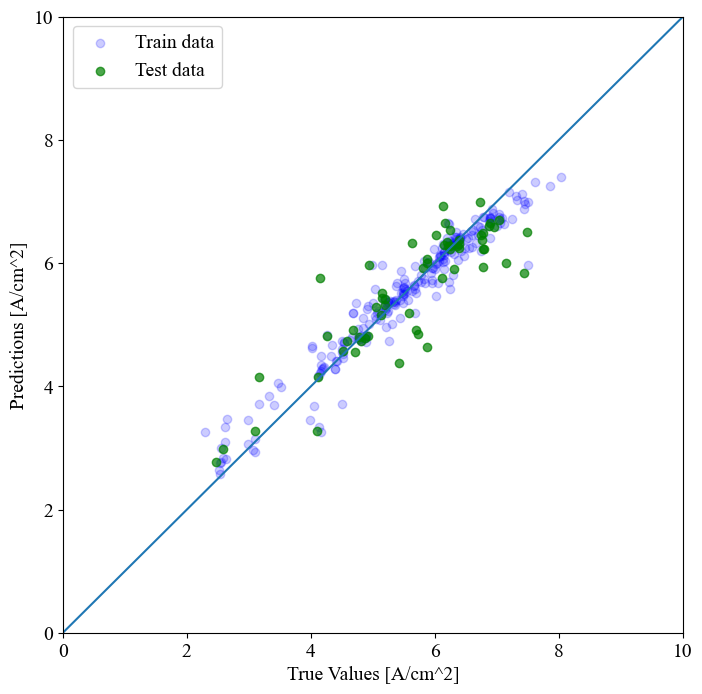

In [9]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# The performance diagram of the model on the training set and the verification set
test_predictions = rf.predict(X_test).flatten()
train_predictions = rf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.364190
8            Cr    0.110512
0   Environment    0.079980
11           Cu    0.078663
4             δ    0.066709
5            Δχ    0.064132
10           Ni    0.048629
3         ΔHmix    0.043718
7            Tm    0.040713
6           e/a    0.038497
9            Fe    0.037590
2         [Cl-]    0.026668


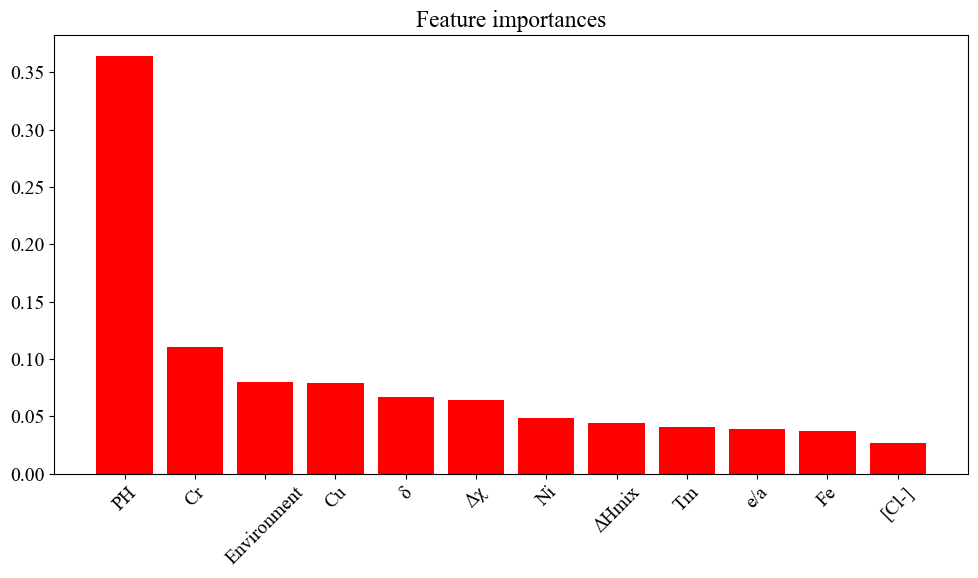

In [10]:
# Get the name of the input feature
feature_names = dataset.columns[:-1]

# Output each feature name and corresponding importance value
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# Draw a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [11]:
# Save the trained model
dump(rf, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/RF_6.pkl', 'wb'))

# Cross-validation

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor


# Create a random forest regression model
cv_rf = RandomForestRegressor()

# Predictive training set
y_pred_train_cv = cross_val_predict(cv_rf, X_train, y_train, cv=5)

# Fit the model on the entire training set
cv_rf.fit(X_train, y_train)

# Predictive test set
y_pred_test_cv = cv_rf.predict(X_test)

In [13]:
print('The evaluation index of random forest cross-validation regression model:')

# Calculate R^2 score
score_test = cv_rf.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

# Calculate R^2 score
score_train = cv_rf.score(X_train, y_train)
print('R^2 score on the training set：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

The evaluation index of random forest cross-validation regression model:
R^2 score on the test set： 0.7247506197870593
R^2 score on the training set： 0.9340161002765318
MAE on the test set: 0.42228458841612354
MAE on the training set: 0.552745661560363
MSE on the test set: 0.35952140895764517
MSE on the training set: 0.5582666992868006
RMSE on test set: 0.5996010414914613
RMSE on the training set: 0.7471724695723208


<Figure size 800x600 with 0 Axes>

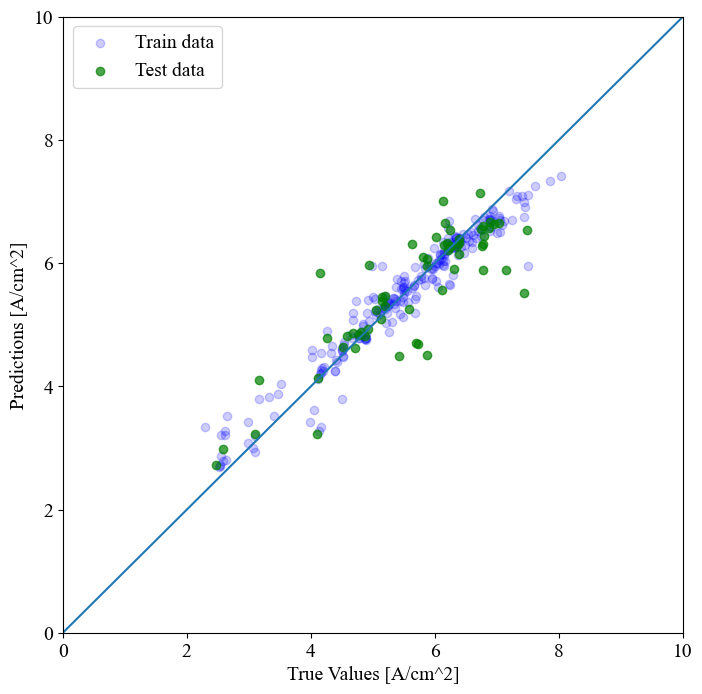

In [14]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# The performance diagram of the model on the training set and the verification set
test_predictions = cv_rf.predict(X_test).flatten()
train_predictions = cv_rf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.377596
8            Cr    0.110888
11           Cu    0.079903
0   Environment    0.063943
5            Δχ    0.063188
4             δ    0.062708
7            Tm    0.048981
10           Ni    0.047857
9            Fe    0.039080
3         ΔHmix    0.037656
6           e/a    0.036836
2         [Cl-]    0.031363


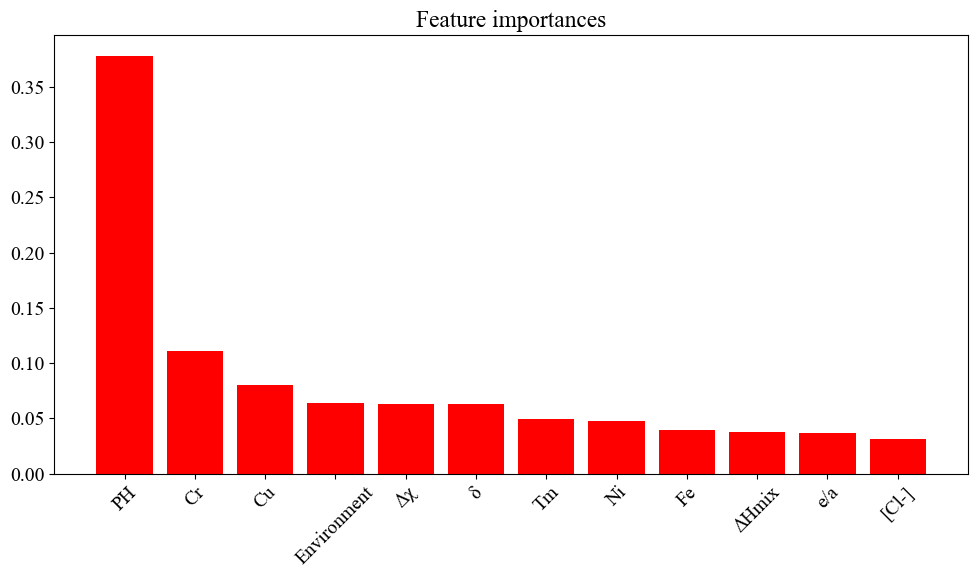

In [15]:
# Get the name of the input feature
feature_names = dataset.columns[:-1]

# Output each feature name and corresponding importance value
importances = cv_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# Draw a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [29]:
# Save the trained model
dump(cv_rf, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/CVRF_6.pkl', 'wb'))

# Bayesian Optimization

In [16]:
import optuna


def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    BOrf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    BOrf.fit(X_train, y_train)
    y_pred = BOrf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Run Bayesian Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

print('Best MSE:', study.best_value)

# Output the best hyperparameters
best_params_rf = study.best_params
print('Best params for Random Forest:', best_params_rf)

# Training the best model
BOrf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'], 
                             max_depth=best_params_rf['max_depth'], 
                             min_samples_split=best_params_rf['min_samples_split'], 
                             min_samples_leaf=best_params_rf['min_samples_leaf'], 
                             random_state=42)

BOrf.fit(X_train, y_train)

[I 2025-04-24 19:08:30,740] A new study created in memory with name: no-name-165ef47a-0e27-4a54-a0f1-02d5e1b408dd
[I 2025-04-24 19:08:30,820] Trial 0 finished with value: 0.4133261058285819 and parameters: {'n_estimators': 44, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.4133261058285819.
[I 2025-04-24 19:08:30,856] Trial 1 finished with value: 0.41078215919459493 and parameters: {'n_estimators': 21, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.41078215919459493.
[I 2025-04-24 19:08:31,844] Trial 2 finished with value: 0.34985588569601467 and parameters: {'n_estimators': 457, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.34985588569601467.
[I 2025-04-24 19:08:32,000] Trial 3 finished with value: 0.33488269644161567 and parameters: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 3 with valu

Best MSE: 0.3165691577740573
Best params for Random Forest: {'n_estimators': 42, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 2}


RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=42, random_state=42)

In [25]:
print('Random Forest Bayesian Optimization Regression Model Evaluation Index Display：')

# Prediction test set
y_pred_test = BOrf.predict(X_test)

# Prediction training set
y_pred_train = BOrf.predict(X_train)

# Calculating the R^2 score
score_test = BOrf.score(X_test, y_test)
print('R^2 score on test set:', score_test)
# Calculate R^2 score
score_train = BOrf.score(X_train, y_train)
print('R^2 score on the training set:', score_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Random Forest Bayesian Optimization Regression Model Evaluation Index Display：
R^2 score on test set: 0.7576348381464336
R^2 score on the training set: 0.8857583823728827
MAE on the test set: 0.4205118911172866
MAE on the training set: 0.2923684792601858
MSE on the test set: 0.3165691577740573
MSE on the training set: 0.16384164602040843
RMSE on test set: 0.5626447882759222
RMSE on the training set: 0.4047735737673699


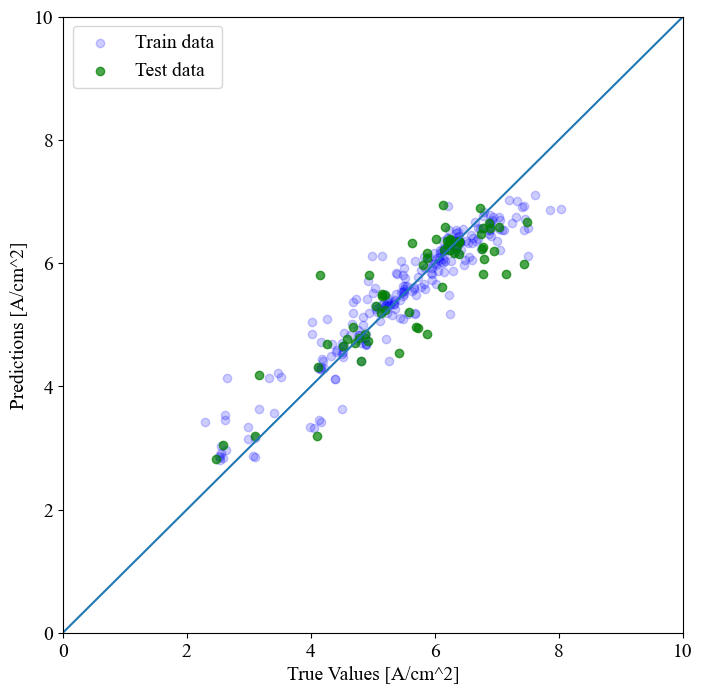

In [26]:
# The performance diagram of the model on the training set and the verification set
test_predictions = BOrf.predict(X_test).flatten()
train_predictions = BOrf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.379213
11           Cu    0.100722
8            Cr    0.093479
0   Environment    0.091733
4             δ    0.072536
5            Δχ    0.060911
10           Ni    0.045275
7            Tm    0.038665
9            Fe    0.037802
3         ΔHmix    0.035661
6           e/a    0.024184
2         [Cl-]    0.019821


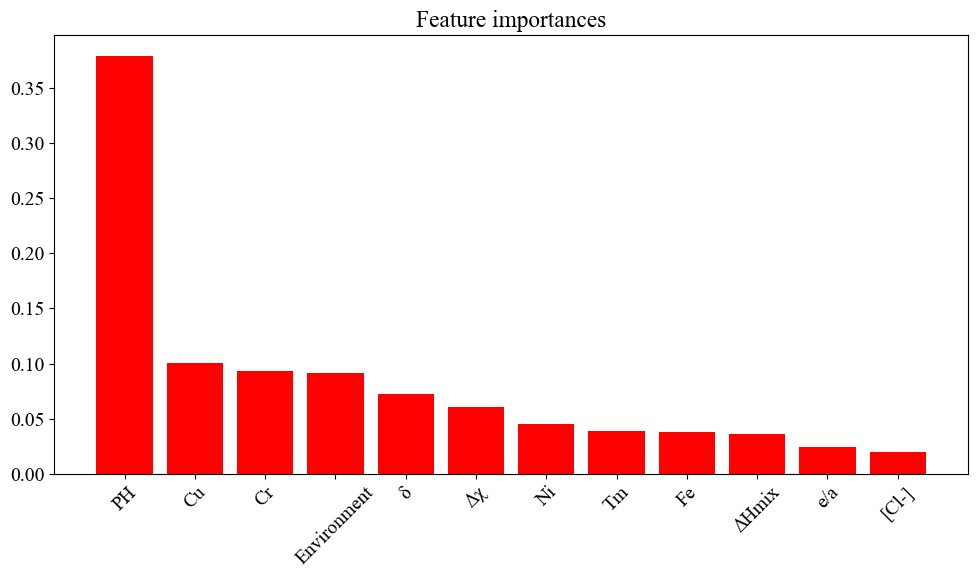

In [27]:
# Get the name of the input feature
feature_names = dataset.columns[:-1]

# Output each feature name and corresponding importance value
importances = BOrf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# Draw a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [30]:
# Save the trained model
dump(BOrf, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BORF_6.pkl', 'wb'))

# Support vector machine

In [31]:
from sklearn.svm import SVR

# Build a support vector machine regressor
svm = SVR()

# Training Support Vector Machine Regressor
svm.fit(X_train, y_train)

SVR()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Display of evaluation index of initial training regression model of support vector machine:')

# Predictive test set
y_pred_test = svm.predict(X_test)

# Predictive training set
y_pred_train = svm.predict(X_train)

# Calculate R^2 score
score_test = svm.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

# Calculate R^2 score
score_train = svm.score(X_train, y_train)
print('R^2 score on the training set：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation index of initial training regression model of support vector machine:
R^2 score on the test set： 0.6940406592430475
R^2 score on the training set： 0.7320471744120358
MAE on the test set: 0.4227902632286222
MAE on the training set: 0.4228864748590118
MSE on the test set: 0.3996337182942739
MSE on the training set: 0.38428930640186054
RMSE on test set: 0.6321658945990949
RMSE on the training set: 0.6199107245417363


<Figure size 800x600 with 0 Axes>

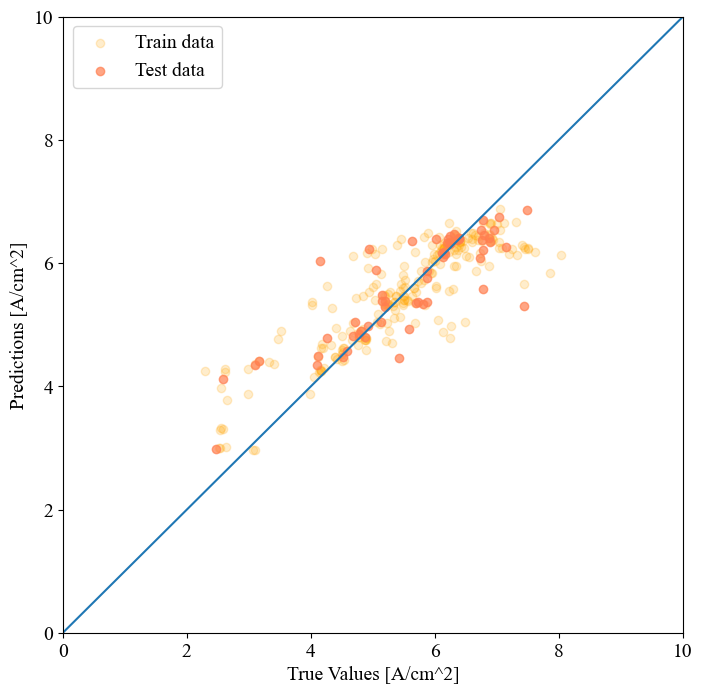

In [33]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# The performance diagram of the model on the training set and the verification set
test_predictions = svm.predict(X_test).flatten()
train_predictions = svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [ ]:
# Save the trained model
dump(svm, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/SVM_7.pkl', 'wb'))

# Cross-validation

In [ ]:
from sklearn.svm import SVR

# Build a support vector machine regressor
cv_svm = SVR()

# Predictive training set
y_pred_train_cv = cross_val_predict(cv_svm, X_train, y_train, cv=5)

# Fit the model on the entire training set
cv_svm.fit(X_train, y_train)

# Predictive test set
y_pred_test_cv = cv_svm.predict(X_test)

In [36]:
print('Display of evaluation indicators of support vector machine cross-validation regression model:')

# Calculate R^2 scoresscore_test = cv_svm.score(X_test, y_test)
print('R^2 score on test set:', score_test)
# Calculate R^2 score
score_train = cv_svm.score(X_train, y_train)
print('R^2 score on the training set:', score_train)
mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indicators of support vector machine cross-validation regression model:
R^2 score on test set: 0.6940406592430475
R^2 score on the training set: 0.7320471744120358
MAE on the test set: 0.4227902632286222
MAE on the training set: 0.5710874430950432
MSE on the test set: 0.3996337182942739
MSE on the training set: 0.6035787431908125
RMSE on test set: 0.6321658945990949
RMSE on the training set: 0.7769033036297455


<Figure size 800x600 with 0 Axes>

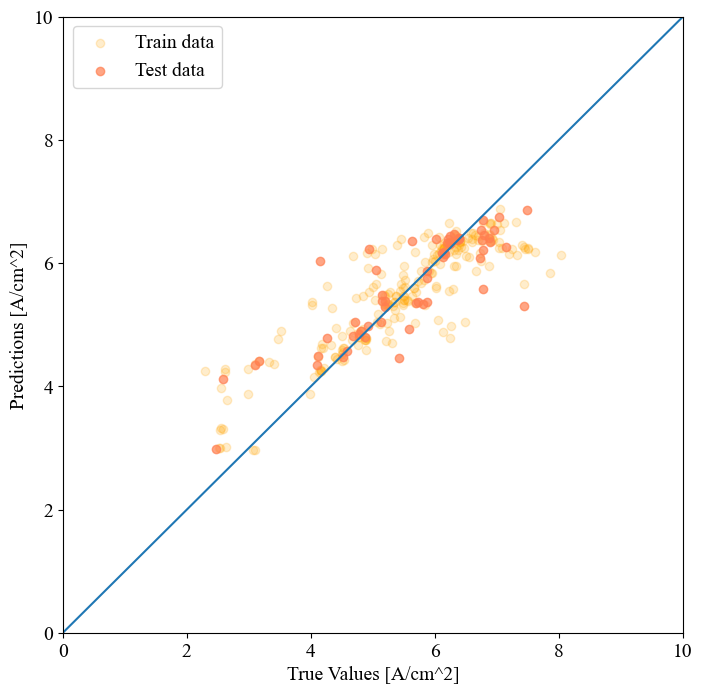

In [37]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# The performance diagram of the model on the training set and the verification set
test_predictions = cv_svm.predict(X_test).flatten()
train_predictions = cv_svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [39]:
# 保存训练好的模型
dump(cv_svm, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/CVSVM_7.pkl', 'wb'))

# Bayesian Optimization

In [40]:
!pip install optuna


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna


# Define the target function
def objective(trial):
    # Define hyperparameter search space
    C = trial.suggest_loguniform('C', 100, 1000)
    gamma = trial.suggest_loguniform('gamma', 0.1, 10)
    epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    degree = 0
    

    # Define the model
    BO_svm = SVR(C=C, gamma=gamma, epsilon=epsilon, kernel=kernel, degree=degree)
    BO_svm.fit(X_train, y_train)

    # Calculate indicators
    y_pred = BO_svm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Returns the target value (minimize mean square error)
    return mse

# Call Optuna library for hyperparameter search
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Output optimal hyperparameters and minimize mean square error
print('Best parameters for SVM: ', study.best_params)
print('Best MSE: ', study.best_value)

# Training the model with optimal hyperparameters and evaluating performance
BO_svm = SVR(**study.best_params)
BO_svm.fit(X_train, y_train)

# Predictive test set
y_pred_test = BO_svm.predict(X_test)

# Predictive training set
y_pred_train = BO_svm.predict(X_train)

[I 2025-04-24 19:19:02,732] A new study created in memory with name: no-name-6f3768c9-8191-4bea-8f75-52ec20e8249b
C:\Users\SUMANTH REDDY\AppData\Local\Temp\ipykernel_20460\2485777351.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 100, 1000)
C:\Users\SUMANTH REDDY\AppData\Local\Temp\ipykernel_20460\2485777351.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
C:\Users\SUMANTH REDDY\AppData\Local\Temp\ipykernel_20460\2485777351.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releas

Best parameters for SVM:  {'C': 110.41681522082298, 'gamma': 0.10004274355114247, 'epsilon': 0.07236745193821677, 'kernel': 'rbf'}
Best MSE:  0.22232558238798575


In [42]:
print('Display of evaluation index of Bayesian optimization regression model of support vector machine:')

# Calculate R^2 scoresscore_test = BO_svm.score(X_test, y_test)
print('R^2 score on test set:', score_test)
# Calculate R^2 scoresscore_train = BO_svm.score(X_train, y_train)
print('R^2 score on the training set:', score_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation index of Bayesian optimization regression model of support vector machine:
R^2 score on test set: 0.6940406592430475
R^2 score on the training set: 0.7320471744120358
MAE on the test set: 0.3573027963847626
MAE on the training set: 0.1637975281676998
MSE on the test set: 0.22232558238798575
MSE on the training set: 0.09838195117771344
RMSE on test set: 0.47151413805737125
RMSE on the training set: 0.3136589727358576


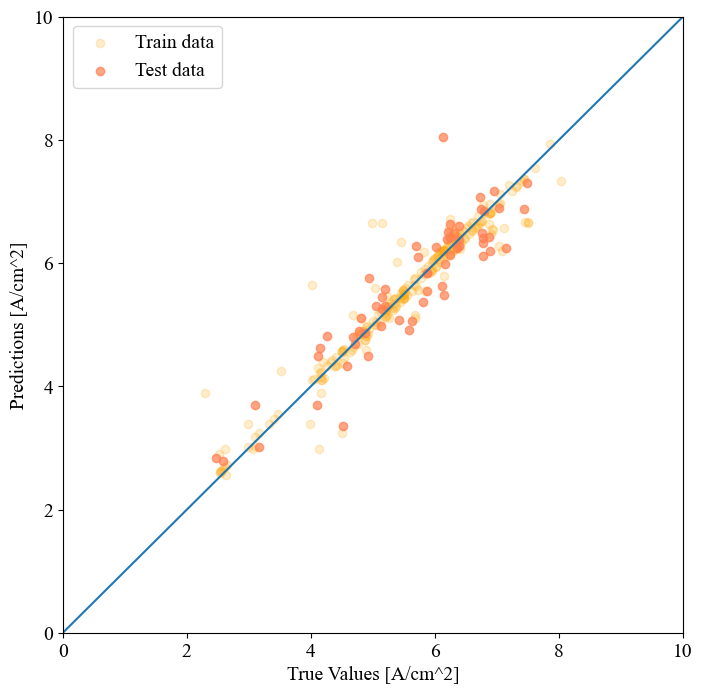

In [43]:
# The performance diagram of the model on the training set and the verification set
test_predictions = BO_svm.predict(X_test).flatten()
train_predictions = BO_svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [ ]:
# Save the trained model
dump(BO_svm, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BOSVM_7.pkl', 'wb'))

# Gradient Improvement Decision Tree

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define Gradient Boosting Regressor
gbdt = GradientBoostingRegressor()

# Training the model
gbdt.fit(X_train, y_train)

GradientBoostingRegressor()

In [48]:
print('Display of evaluation indicators for initial training regression model of gradient enhancement decision tree:')

# Predictive test set
y_pred_test = gbdt.predict(X_test)

# Predict the training sety_pred_train = gbdt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R on the test set^2 Score: ",r2_test)
print("R on the training set^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indicators for initial training regression model of gradient enhancement decision tree:
R on the test set^2 Score:  0.7642781579671343
R on the training set^2 Score:  0.9314013651544122
MAE on the test set: 0.4088635370841836
MAE on the training set: 0.1637975281676998
MSE on the test set: 0.30789187864541123
MSE on the training set: 0.09838195117771344
RMSE on test set: 0.5548800578912628
RMSE on the training set: 0.3136589727358576


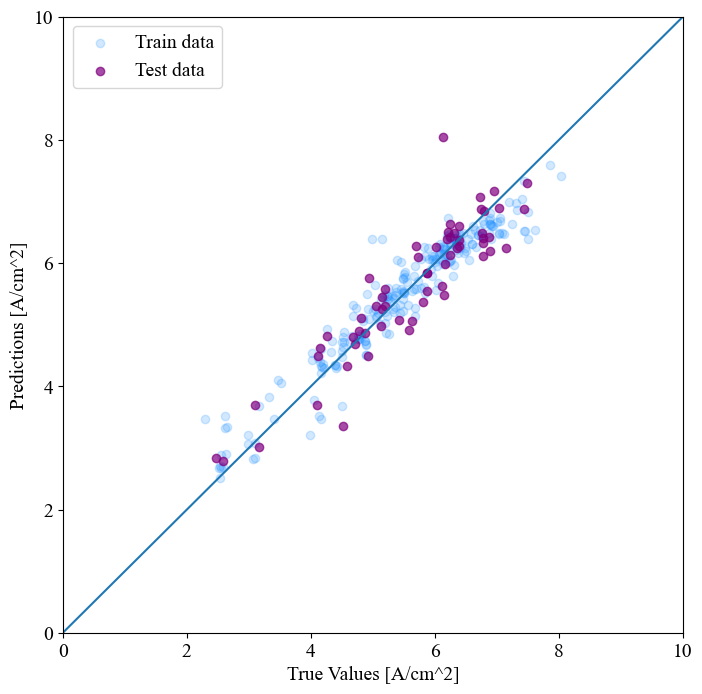

In [50]:
# Set image size, font size, font typefig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test setrmance of the model on the training set and test set
gbdt.predict(X_test).flatten()
train_predictions = gbdt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [51]:
# Save the trained model
dump(gbdt, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/GBDT_6.pkl', 'wb'))

# Cross-validation

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Defining Gradient Boosting Regressor
cv_gbdt = GradientBoostingRegressor()

# Predictive training set
y_pred_train_cv = cross_val_predict(cv_gbdt, X_train, y_train, cv=5)

# Fit the model on the entire training set
cv_gbdt.fit(X_train, y_train)

# Predictive test set
y_pred_test_cv = cv_gbdt.predict(X_test)

In [53]:
print('Gradient enhancement decision tree cross-validation regression model evaluation index display:')

# Calculate R^2 scoresscore_test = cv_gbdt.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

#Calculate R^2 score
score_train = cv_gbdt.score(X_train, y_train)
print('R^2 score on the training set：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Gradient enhancement decision tree cross-validation regression model evaluation index display:
R^2 score on the test set： 0.6940406592430475
R^2 score on the training set： 0.9134292789051357
MAE on the test set: 0.4085819394467204
MAE on the training set: 0.5705743483014359
MSE on the test set: 0.3087405876567572
MSE on the training set: 0.5668653215398505
RMSE on test set: 0.5556442995809074
RMSE on the training set: 0.7529045899314537


<Figure size 800x600 with 0 Axes>

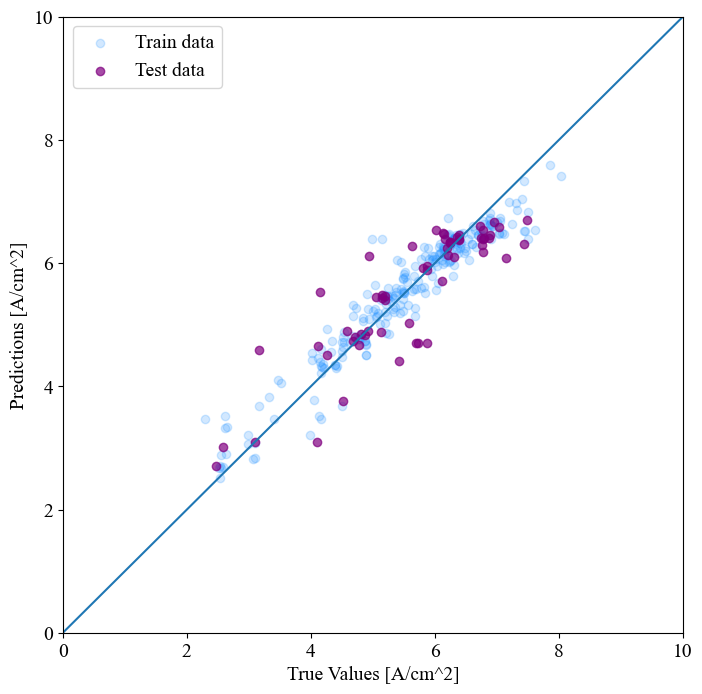

In [54]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = cv_gbdt.predict(X_test).flatten()
train_predictions = cv_gbdt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [55]:
# Save the trained model
dump(cv_gbdt, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/CVGBDT_6.pkl', 'wb'))

# Bayesian Optimization

In [56]:
import optuna

# Define the target function
def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
        
    # Build a gradient boosting tree model
    BOmodel = GradientBoostingRegressor(n_estimators=n_estimators,
                                       learning_rate=learning_rate,
                                       max_depth=max_depth,
                                       max_features=max_features,
                                       loss='squared_error',
                                       random_state=42)
    # Training the model
    BOmodel.fit(X_train, y_train)
    
    # Calculate prediction error
    y_pred = BOmodel.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Running the optimized search algorithm
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Print optimal parameters
print(f'Best params: {study.best_params}')

# Build a gradient boost tree model and use optimal parameters for training and prediction
BOmodel = GradientBoostingRegressor(n_estimators=study.best_params['n_estimators'],
                                   learning_rate=study.best_params['learning_rate'],
                                   max_depth=study.best_params['max_depth'],
                                   max_features=study.best_params['max_features'],
                                   loss='squared_error',
                                    random_state=42)
BOmodel.fit(X_train, y_train)

# Predictive test set
y_pred_test = BOmodel.predict(X_test)

# Predictive training set
y_pred_train = BOmodel.predict(X_train)

[I 2025-04-24 20:13:10,131] A new study created in memory with name: no-name-5ac6a457-03e6-42f7-9836-79af55990250
C:\Users\SUMANTH REDDY\AppData\Local\Temp\ipykernel_20460\1315341052.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2025-04-24 20:13:10,983] Trial 0 finished with value: 0.5150313681024052 and parameters: {'n_estimators': 965, 'learning_rate': 0.31875714309621983, 'max_depth': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5150313681024052.
C:\Users\SUMANTH REDDY\AppData\Local\Temp\ipykernel_20460\1315341052.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rat

Best params: {'n_estimators': 155, 'learning_rate': 0.06901063518378962, 'max_depth': 3, 'max_features': 'log2'}


In [73]:
print('Display of evaluation indexes of Bayesian optimization regression model for gradient enhancement decision tree:')

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 on the test set Score: ",r2_test)
print("R^2 on the training setScore: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indexes of Bayesian optimization regression model for gradient enhancement decision tree:
R^2 on the test set Score:  0.5024150937068806
R^2 on the training setScore:  0.5164549554915974
MAE on the test set: 0.6482282354960895
MAE on the training set: 0.6508812871922369
MSE on the test set: 0.6499285355271787
MSE on the training set: 0.6934847182911644
RMSE on test set: 0.8061814532269883
RMSE on the training set: 0.8327572985517235


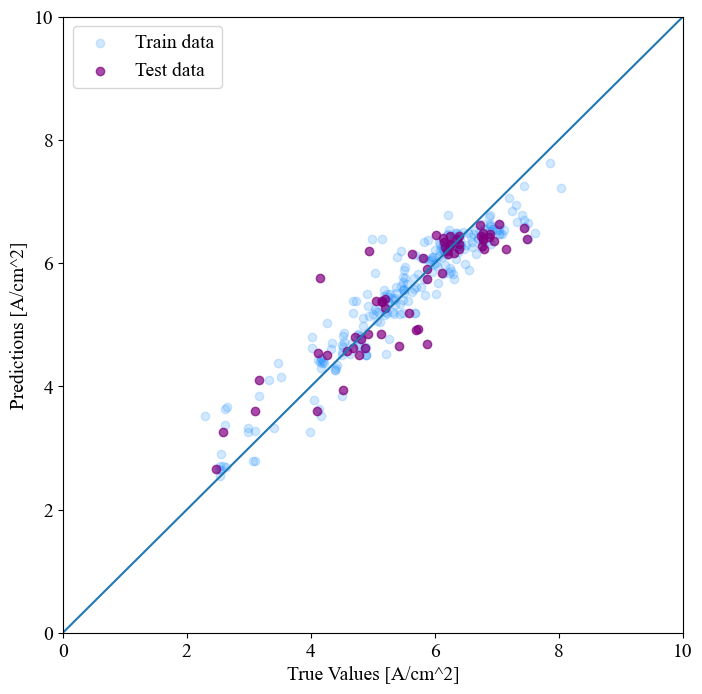

In [74]:
# Set image size, font size, font typefig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = BOmodel.predict(X_test).flatten()
train_predictions = BOmodel.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [57]:
# Save the trained model
dump(BOmodel, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BOGBDT_6.pkl', 'wb'))

# Extreme gradient boost

In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.4/150.0 MB 20.2 MB/s eta 0:00:08
   -- ------------------------------------- 7.9/150.0 MB 20.3 MB/s eta 0:00:08
   --- ------------------------------------ 12.3/150.0 MB 20.3 MB/s eta 0:00:07
   ---- ----------------------------------- 16.5/150.0 MB 20.4 MB/s eta 0:00:07
   ----- ---------------------------------- 21.0/150.0 MB 20.4 MB/s eta 0:00:07
   ------ --------------------------------- 25.4/150.0 MB 20.6 MB/s eta 0:00:07
   ------- -------------------------------- 29.9/150.0 MB 20.6 MB/s eta 0:00:06
   --------- ------------------------------ 34.1/150.0 MB 20.6 MB/s eta 0:00:06
   ---------- ----------------------------- 38.5/150.0 MB 20.6 MB/s eta 0:00:06
   ----------- ---------------------------- 41.4/150.0 MB 20.0 MB/s eta 0:00:06
   ----------- ---------------------------- 41.9/150.0 MB 19.1 MB/s eta 0:00:06
   ----------- ---------------------------- 44.3/15

In [59]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create XGBoost regression model
xgbt = xgb.XGBRegressor()

# Fit the model on the training set
xgbt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [60]:
print('Display of evaluation indexes for initial training model for extreme gradient enhancement:')

# Predictive test set
y_pred_test = xgbt.predict(X_test)

# Predictive training set
y_pred_train = xgbt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 on the test set Score: ",r2_test)
print("R^2 on the training set Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indexes for initial training model for extreme gradient enhancement:
R^2 on the test set Score:  0.7245526642267373
R^2 on the training set Score:  0.9728966003190782
MAE on the test set: 0.4256353023166164
MAE on the training set: 0.05274391242471578
MSE on the test set: 0.3597799717994686
MSE on the training set: 0.03887082228619605
RMSE on test set: 0.5998166151412184
RMSE on the training set: 0.19715684691685464


<Figure size 800x600 with 0 Axes>

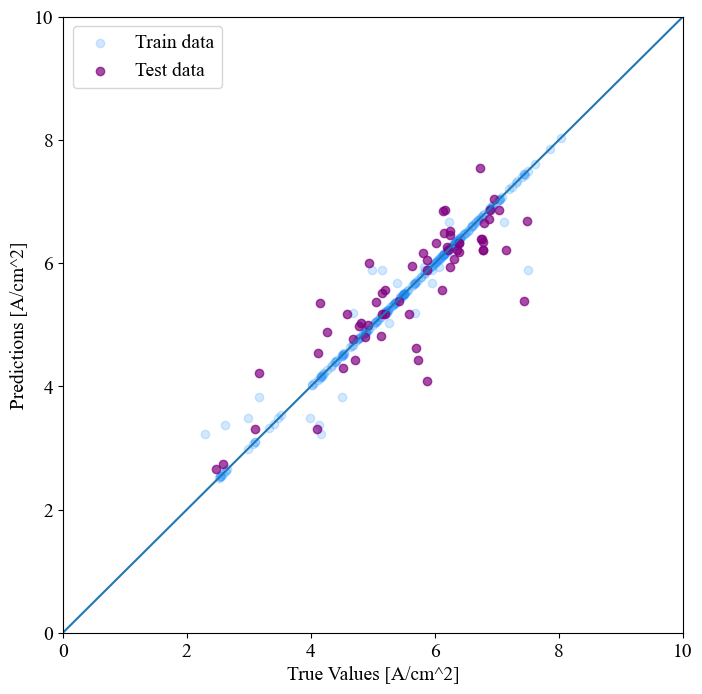

In [63]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = xgbt.predict(X_test).flatten()
train_predictions = xgbt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [61]:
# Save the trained model
dump(xgbt, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/XGBT_6.pkl', 'wb'))

# Bayesian Optimization

In [72]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 30, step=2),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    BO_xgbt = XGBRegressor(**params, random_state=42)
    BO_xgbt.fit(X_train, y_train)
    
    # Calculate indicators
    y_pred = BO_xgbt.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Run Bayesian Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

print('Best MSE:', study.best_value)

# Output the best hyperparameters
best_params_xgb = study.best_params
print('Best params for XGBoost:', best_params_xgb)

# Training the best model
BO_xgbt = XGBRegressor(**best_params_xgb, random_state=42)
BO_xgbt.fit(X_train, y_train)

[I 2025-04-24 20:33:40,739] A new study created in memory with name: no-name-6e958f69-3dec-43fb-8e4a-db0157f8a2b5
[I 2025-04-24 20:33:40,779] Trial 0 finished with value: 0.9473914187600204 and parameters: {'n_estimators': 14, 'max_depth': 26, 'learning_rate': 0.15029040825138448, 'subsample': 0.1568082829551197, 'colsample_bytree': 0.1320262130112775, 'min_child_weight': 5}. Best is trial 0 with value: 0.9473914187600204.
[I 2025-04-24 20:33:40,832] Trial 1 finished with value: 0.6697304148087365 and parameters: {'n_estimators': 82, 'max_depth': 4, 'learning_rate': 0.42014127479563573, 'subsample': 0.10587346402196945, 'colsample_bytree': 0.18961569708880754, 'min_child_weight': 8}. Best is trial 1 with value: 0.6697304148087365.
[I 2025-04-24 20:33:41,721] Trial 2 finished with value: 0.3409391297377266 and parameters: {'n_estimators': 636, 'max_depth': 30, 'learning_rate': 0.28956085199840725, 'subsample': 0.7211276978858372, 'colsample_bytree': 0.7327756988576991, 'min_child_weight

Best MSE: 0.2669943324766187
Best params for XGBoost: {'n_estimators': 331, 'max_depth': 24, 'learning_rate': 0.10052435948431944, 'subsample': 0.6340299334774899, 'colsample_bytree': 0.7692391364461577, 'min_child_weight': 8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7692391364461577, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.10052435948431944,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=24, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=331, n_jobs=None,
             num_parallel_tree=None, ...)

In [76]:
print('Display of evaluation indexes for Bayesian optimization model for extreme gradient enhancement:')

# Predictive test set
y_pred_test = BO_xgbt.predict(X_test)

# Predictive training set
y_pred_train = BO_xgbt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 on the test set Score: ",r2_test)
print("R^2 on the training set Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indexes for Bayesian optimization model for extreme gradient enhancement:
R^2 on the test set Score:  0.7955892953701267
R^2 on the training set Score:  0.9676357720883063
MAE on the test set: 0.3884942668737713
MAE on the training set: 0.093458859412674
MSE on the test set: 0.2669943324766187
MSE on the training set: 0.04641573257951544
RMSE on test set: 0.5167149431520427
RMSE on the training set: 0.2154431075238088


<Figure size 800x600 with 0 Axes>

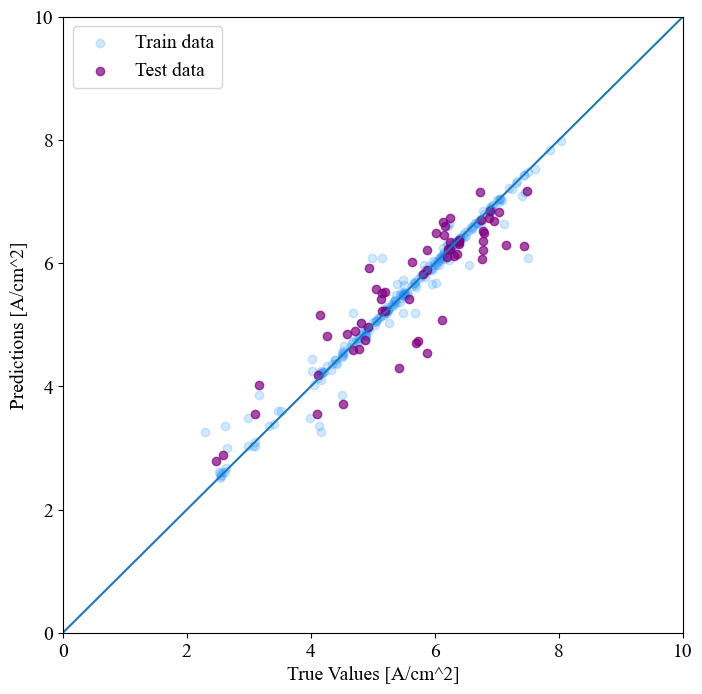

In [77]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = BO_xgbt.predict(X_test).flatten()
train_predictions = BO_xgbt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [78]:
# Save the trained model
dump(BO_xgbt, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BOXGBT_6.pkl', 'wb'))

# Ridge Return

In [66]:
from sklearn.linear_model import Ridge

# Create a ridge regression model
rr = Ridge()

# Fit the model on the training set
rr.fit(X_train, y_train)

Ridge()

In [67]:
print('Display of evaluation index of the initial training model of ridge regression:')

# Predictive test set
y_pred_test = rr.predict(X_test)

# Predictive training set
y_pred_train = rr.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 on the test set Score: ",r2_test)
print("R^2 on the training set Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation index of the initial training model of ridge regression:
R^2 on the test set Score:  0.5024150937068806
R^2 on the training set Score:  0.5164549554915974
MAE on the test set: 0.6482282354960895
MAE on the training set: 0.6508812871922369
MSE on the test set: 0.6499285355271787
MSE on the training set: 0.6934847182911644
RMSE on test set: 0.8061814532269883
RMSE on the training set: 0.8327572985517235


<Figure size 800x600 with 0 Axes>

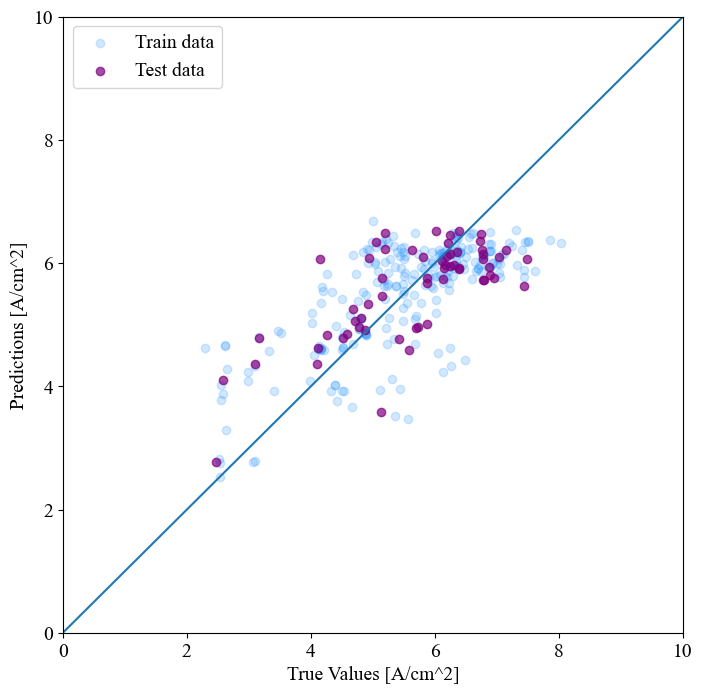

In [69]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = rr.predict(X_test).flatten()
train_predictions = rr.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [70]:
# Save the trained model
dump(rr, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/RR_6.pkl', 'wb'))

# Bayesian Optimization

In [71]:
import optuna

# Define the target function for ridge regression
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    
    # Create a ridge regression model
    BO_rr = Ridge(alpha=alpha, random_state=42)
    
    # Fit the model on the training set
    BO_rr.fit(X_train, y_train)
    
    # Make predictions on test sets
    y_pred = BO_rr.predict(X_test)
    
    # Calculate mean square error
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Run Bayesian Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Output optimal mean square error and optimal hyperparameter
best_params_ridge = study.best_params
print('Best MSE:', study.best_value)
print('Best params for Ridge Regression:', best_params_ridge)

# Initialize the ridge regression model using the best hyperparameter
BO_rr = Ridge(**best_params_ridge, random_state=42)

# Fit the best model on the training set
BO_rr.fit(X_train, y_train)

[I 2025-04-24 20:31:25,773] A new study created in memory with name: no-name-e3fcf378-0d73-4d29-b825-99e87b40eb8b
[I 2025-04-24 20:31:25,780] Trial 0 finished with value: 0.6500031722338918 and parameters: {'alpha': 0.7402805384524119}. Best is trial 0 with value: 0.6500031722338918.
[I 2025-04-24 20:31:25,786] Trial 1 finished with value: 0.649348317826871 and parameters: {'alpha': 3.4882021453911127}. Best is trial 1 with value: 0.649348317826871.
[I 2025-04-24 20:31:25,786] Trial 2 finished with value: 0.6487197412464553 and parameters: {'alpha': 9.677913641274518}. Best is trial 2 with value: 0.6487197412464553.
[I 2025-04-24 20:31:25,796] Trial 3 finished with value: 0.6502171258044972 and parameters: {'alpha': 0.04706978392621744}. Best is trial 2 with value: 0.6487197412464553.
[I 2025-04-24 20:31:25,796] Trial 4 finished with value: 0.6502122833747132 and parameters: {'alpha': 0.061999637321307664}. Best is trial 2 with value: 0.6487197412464553.
[I 2025-04-24 20:31:25,803] Tri

Best MSE: 0.6487121129670819
Best params for Ridge Regression: {'alpha': 9.999432083182082}


Ridge(alpha=9.999432083182082, random_state=42)

In [79]:
print('Display of evaluation indexes for Bayesian optimization model of ridge regression:')

# Predictive test set
y_pred_test = BO_rr.predict(X_test)

# Predictive training set
y_pred_train = BO_rr.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 on the test set Score: ",r2_test)
print("R^2 on the training set Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indexes for Bayesian optimization model of ridge regression:
R^2 on the test set Score:  0.5033463861067253
R^2 on the training set Score:  0.5155929876909036
MAE on the test set: 0.6512853881246766
MAE on the training set: 0.655311441911748
MSE on the test set: 0.6487121129670819
MSE on the training set: 0.6947209247299007
RMSE on test set: 0.8054266651701332
RMSE on the training set: 0.8334992049965618


<Figure size 800x600 with 0 Axes>

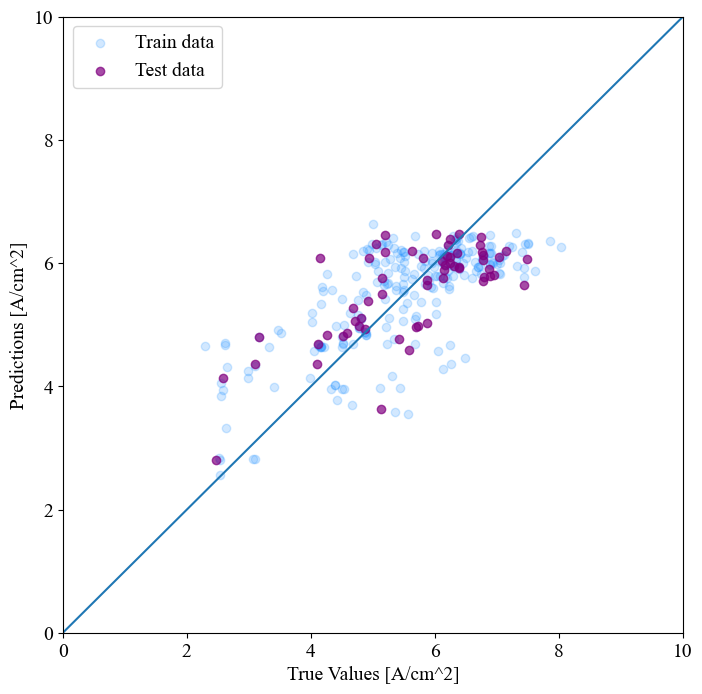

In [80]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = BO_rr.predict(X_test).flatten()
train_predictions = BO_rr.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [81]:
# Save the trained model
dump(BO_rr, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BORR_6.pkl', 'wb'))